In [61]:
import numpy as np
import pandas as pd

In [62]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [63]:
df.shape

(5572, 5)

Stages of the Project 
1. Data Cleaning
2. EDA 
3. Text Preprocessing
4. Model building 
5. Evaluation 
6. Imporvements 
7. Website 
8. Deploy 

### Step 1 : DATA CLEANING

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [65]:
# Droping the last 3 columns 
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , inplace= True)

In [66]:
# Remaning the columns 
df.rename(columns={'v1' : 'target' , 'v2' : 'text'} , inplace= True)

In [67]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [68]:
# Using the label encoding for spam and ham to numerical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [69]:
# Checking the missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [70]:
# Check for duplicates
df.duplicated().sum()

403

In [71]:
# Remove the duplicates
df = df.drop_duplicates(keep='first')

In [72]:
df.shape

(5169, 2)

### 2. EDA 

In [73]:
# Checking what percentage is spam and ham
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x17c262d8d90>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

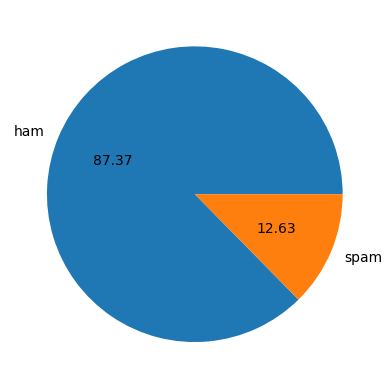

In [74]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() , labels=['ham' , 'spam'] , autopct= "%.02f")

<Axes: xlabel='target', ylabel='count'>

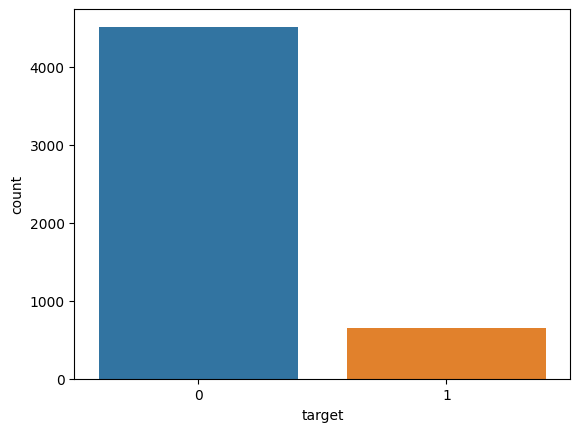

In [75]:
import seaborn as sns
sns.countplot(df, x="target")

This is an imbalanced data 

In [76]:
import nltk

In [77]:
# Counting the no of charecters
df['num_charecters'] = df['text'].apply(len)

In [78]:
df.head()

,target,text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [79]:
# No of Words in each sentence 
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
# whenever you are getting a text we convert it into a word and then count the no of words 

In [80]:
df.head()

,target,text,num_charecters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [81]:
# No of sentences 
import re
df['num_sentences'] = df['text'].apply(lambda x: len(re.split(r'[.!?]+', x)) - 1)

In [82]:
df.head()

,target,text,num_charecters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [83]:
# Getting the description of the num_charecters , num_words and the num_sentences 
df[['num_charecters' , 'num_words' , 'num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.846779
std,58.236293,11.068488,1.745441
min,2.000000,1.000000,0.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,39.000000


In [84]:
# Getting the description for the ham
df[df['target'] == 0][['num_charecters' , 'num_words' , 'num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.692648
std,56.358207,11.116240,1.681598
min,2.000000,1.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,39.000000


In [85]:
# Getting the description for the spam
df[df['target'] == 1][['num_charecters' , 'num_words' , 'num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.912711
std,30.137753,5.967672,1.806610
min,13.000000,2.000000,0.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


Through the above describe we notice that the no of charecters is spam is usally more than ham

<Axes: xlabel='num_charecters', ylabel='Count'>

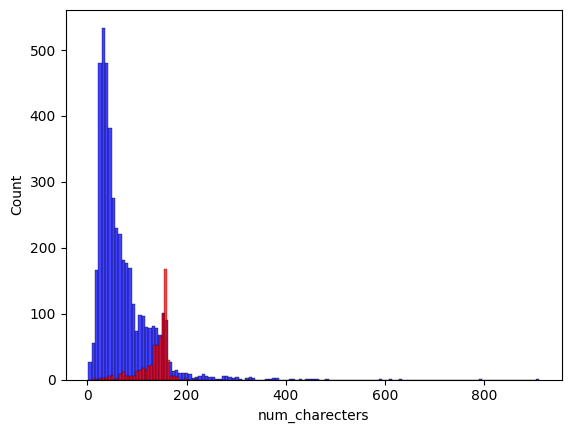

In [86]:
sns.histplot(df[df['target'] == 0]['num_charecters'] , color='blue') # HAM 
sns.histplot(df[df['target'] == 1]['num_charecters'] , color='red') # SPAM 

So again also with this graph this is very much clear that most of the ham has more charcters compared to that of spam

c:\Users\radhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


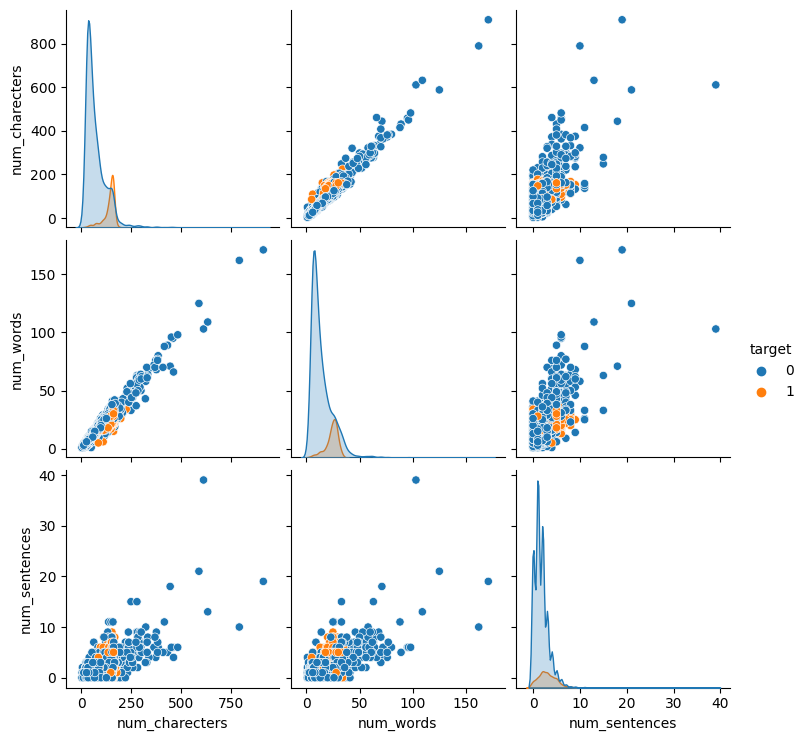

In [87]:
sns.pairplot(df , hue='target')

<Axes: >

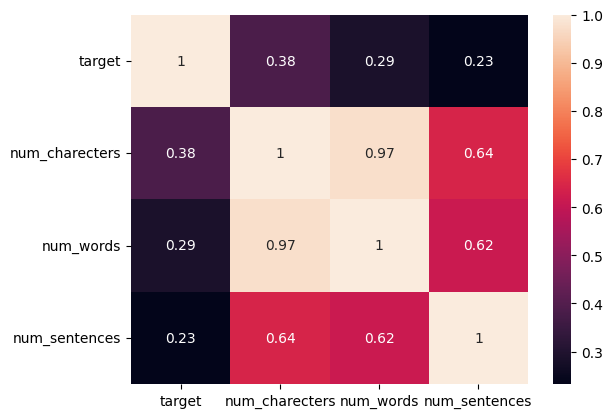

In [88]:
df_numeric = df.drop(columns=['text'])
sns.heatmap(df_numeric.corr(), annot=True)

See the num_charcters as the most strongest corelation with the target so abviously we will only choose that

### 3. DATA/TEXT PREPROCESSING

1. Lower case 
2. Tokenisation
3. Removing special charecters
4. Removing stopwords and punctions
5. Stemming 

In [89]:
# Importing the stopwords
from nltk.corpus import stopwords
# Importing Punctions
import string
string.punctuation
# Importing Steming 
from nltk.stem.porter import PorterStemmer
pt = PorterStemmer()

In [90]:
# So here I am going to write a single function to convert all the text 
def tranform_text(text):
    text = text.lower() # lowering 
    text = nltk.word_tokenize(text) # Tokenization --> this is for breaking the sentences into words
    # Removing the Special Charecters
    res = []
    for i in text:
        if i.isalnum(): # alnum --> AlphaNumeric
            res.append(i)
            
    text = res[:]
    res.clear()
    for i in text:
        # if the word is not in the stopwords or in the punctions then only appned it
        if i not in stopwords.words('English') and i not in string.punctuation:
            res.append(i)
    # Stemming 
    text = res[:]
    res.clear()
    for i in text:
        res.append(pt.stem(i))
    return " ".join(res)

In [91]:
df['text'][12]

'URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'

So after applying all the text processing this how the text will finally look

In [92]:
tranform_text('URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18')

'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18'

In [93]:
df['transformed_text'] = df['text'].apply(tranform_text)

In [94]:
df.head()

,target,text,num_charecters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah think goe usf live around though


Word clouds are a popular visualization tool used to display the most frequent words in a text dataset.

In [95]:
from wordcloud import WordCloud
wc = WordCloud(width=500 , height=500 , min_font_size=10 , background_color='white')

In [96]:
spam_wc =  wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep= " "))

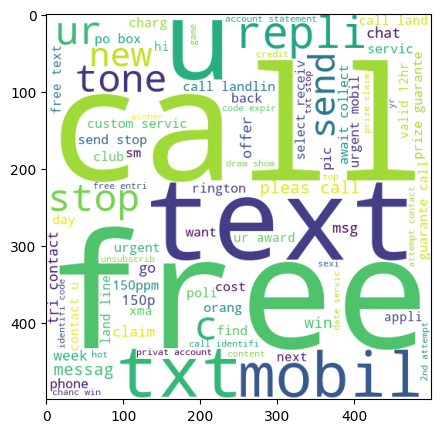

In [97]:
plt.figure(figsize=(10,5))
plt.imshow(spam_wc)

All these Words above are the most frequent words present in a spam msg

In [98]:
ham_wc =  wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep= " "))

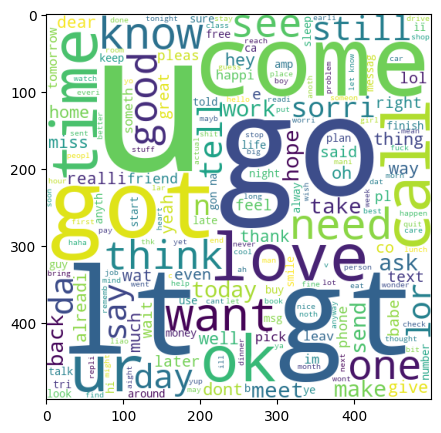

In [99]:
plt.figure(figsize=(10,5))
plt.imshow(ham_wc)

In [100]:
df.head()

,target,text,num_charecters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah think goe usf live around though


Trying to extract top 50 words in the spam 

In [101]:
# So here we create a list and then iterate each sentences and insert each word of each sentences into the list 
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [102]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

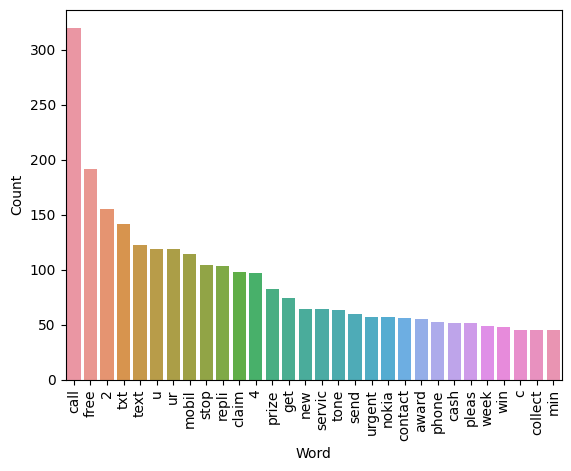

In [103]:
from collections import Counter
common_words_df =  pd.DataFrame(Counter(spam_corpus).most_common(30) , columns=['Word' , 'Count'])
sns.barplot(x = 'Word', y = 'Count' , data = common_words_df)
plt.xticks(rotation='vertical')
plt.show()
# this counter will give me a frq table and the most common will give the highest frq of the words

In [104]:
# Doing the same thing with ham , finding the most frquent elements and then plotting a bar plot
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [105]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

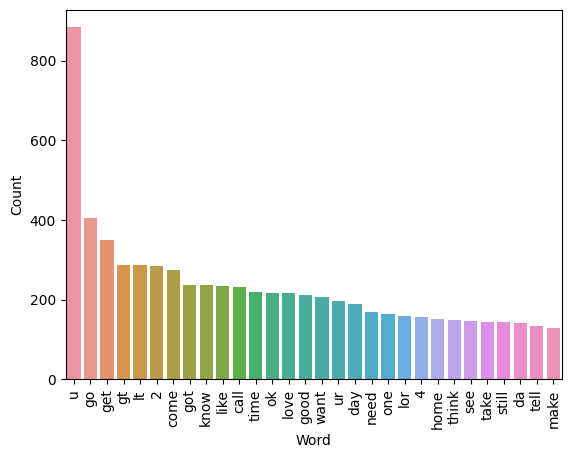

In [106]:
from collections import Counter
common_words_df =  pd.DataFrame(Counter(ham_corpus).most_common(30) , columns=['Word' , 'Count'])
sns.barplot(x = 'Word', y = 'Count' , data = common_words_df)
plt.xticks(rotation='vertical')
plt.show()
# this counter will give me a frq table and the most common will give the highest frq of the words

### 4. Model Building 

In [107]:
# Import Necessary Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import numpy as np

In [108]:
# Sample data
texts = df['transformed_text']
labels = np.array(df['target'])  # 1 for spam, 0 for ham

# Splitting the data into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


In [109]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000)  # max_features is the size of the TF-IDF vectors

# Fit and transform the training data
X_train = tfidf.fit_transform(X_train_raw).toarray()

# Transform the test data (using the same TF-IDF vectorizer)
X_test = tfidf.transform(X_test_raw).toarray()

In [110]:
# Get the number of features from the TF-IDF vectors
tfidf_vector_size = X_train.shape[1]

# Build the ANN model
model = Sequential()
model.add(InputLayer(input_shape=(tfidf_vector_size,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
print(model.summary())


c:\Users\radhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │       100,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,201 (391.41 KB)

 Trainable params: 100,201 (391.41 KB)

 Non-trainable params: 0 (0.00 B)

None


### 5. Training the Model

In [111]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8593 - loss: 0.5241 - val_accuracy: 0.9023 - val_loss: 0.2193
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9445 - loss: 0.1662 - val_accuracy: 0.9739 - val_loss: 0.1024
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9772 - loss: 0.0854 - val_accuracy: 0.9778 - val_loss: 0.0795
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9876 - loss: 0.0514 - val_accuracy: 0.9797 - val_loss: 0.0724
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9880 - loss: 0.0401 - val_accuracy: 0.9797 - val_loss: 0.0706
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9913 - loss: 0.0320 - val_accuracy: 0.9797 - val_loss: 0.0697
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9918 - loss: 0.0289 - val_accuracy: 0.9797 - val_loss: 0.0706
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9963 - loss: 0.0170 - val_accuracy: 0.

In [112]:
model.save("tfidf_ann_model.h5")  

import os
import pickle

# Create the 'model' directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save the TF-IDF vectorizer to a file
with open('model/tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

In [113]:
y_pred = model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [114]:
y_pred = np.where(y_pred >= 0.5, 1, 0)  # Convert probabilities to binary labels

In [115]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , y_pred)

array([[879,  10],
       [ 13, 132]], dtype=int64)

In [116]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

97.77562862669245


In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       889
           1       0.93      0.91      0.92       145

    accuracy                           0.98      1034
   macro avg       0.96      0.95      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [118]:
# Sample new data
new_texts = ["Claim your prize now", "Let's meet for lunch"]

# Transform the new data using the existing TF-IDF vectorizer
X_new = tfidf.transform(new_texts).toarray()

# Predict
predictions = model.predict(X_new)
predicted_labels = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels

print(predicted_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[1]
 [0]]
